<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

c:\Users\JacquesFurst\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


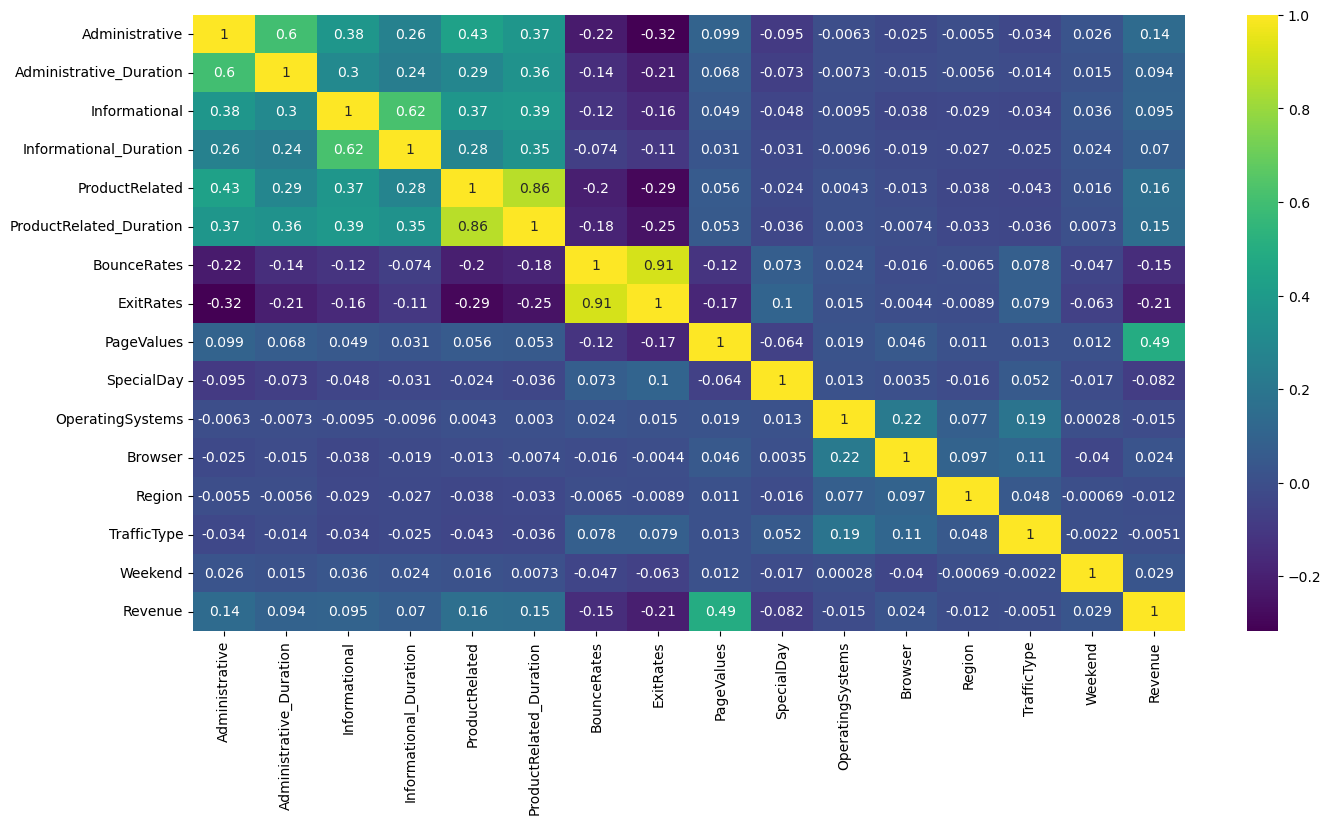

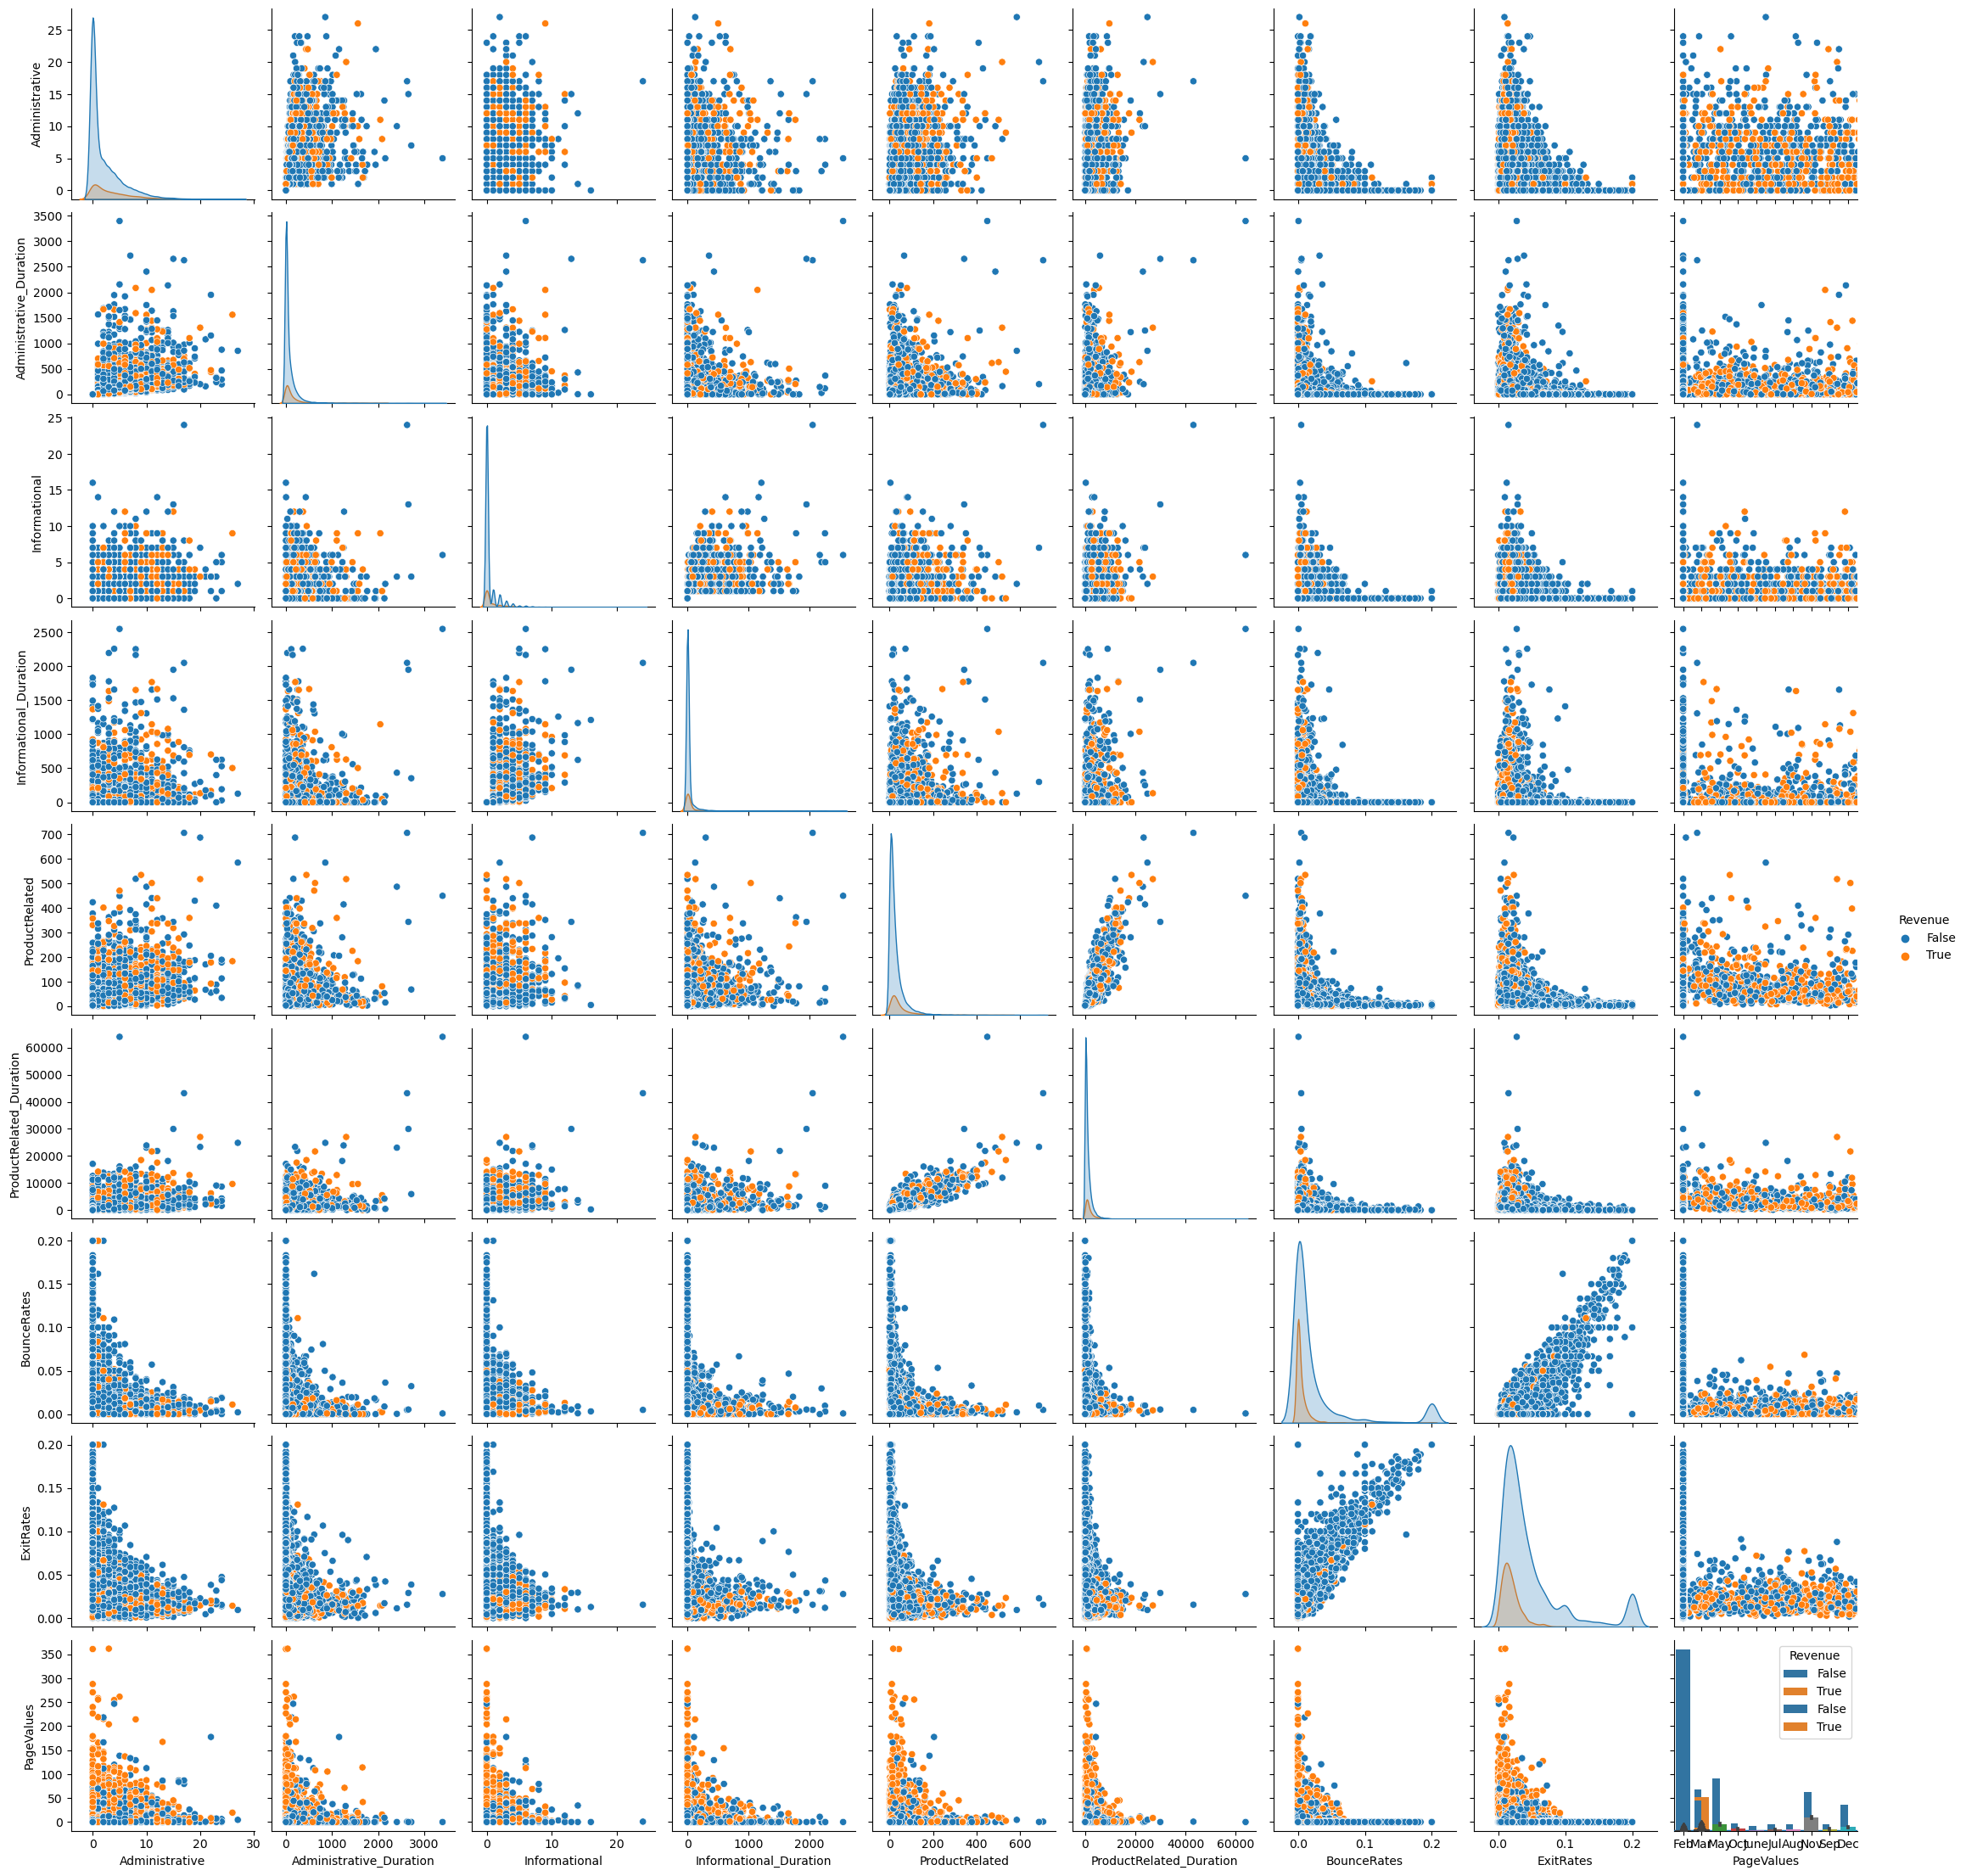

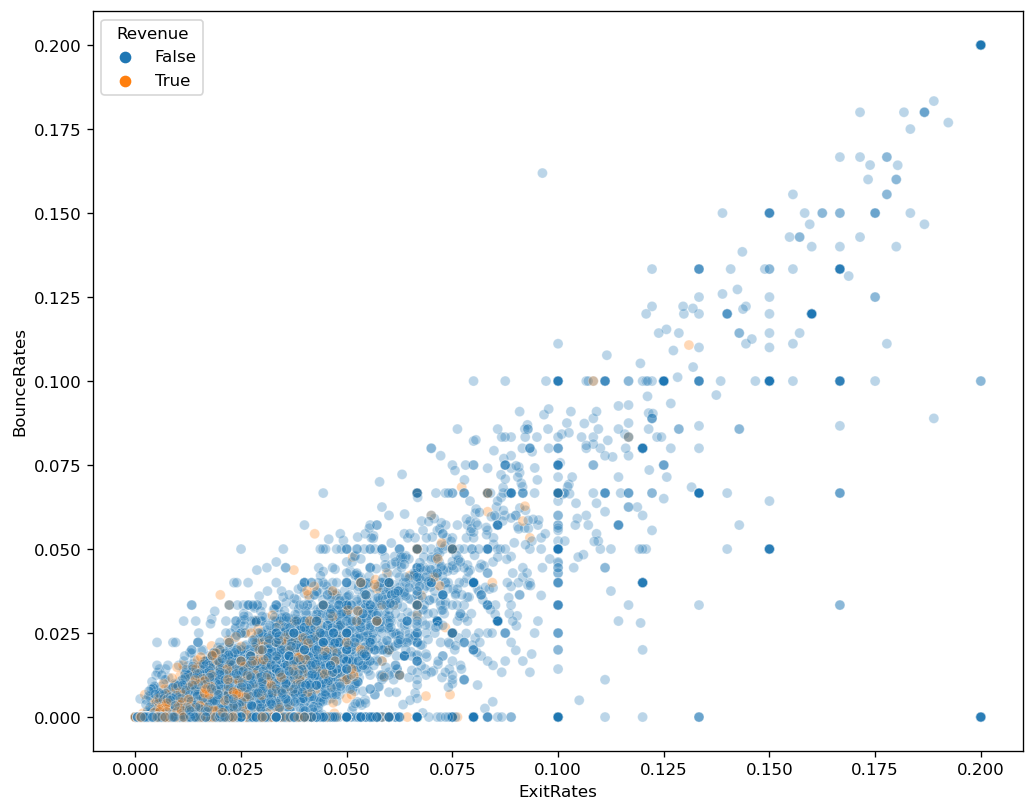

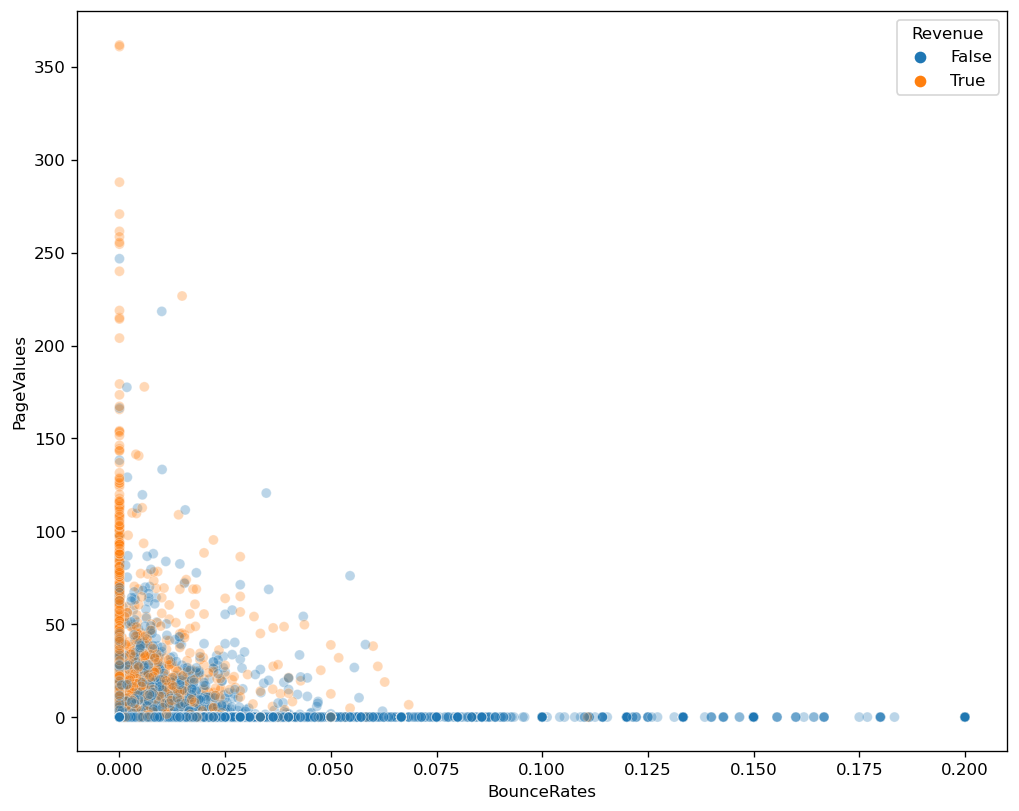

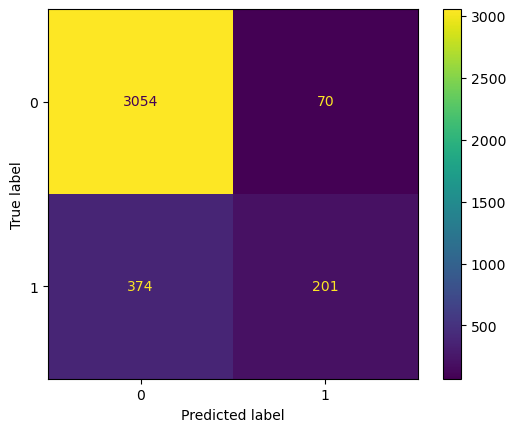

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/some_user/scripts/model1/online_shoppers_intention.csv')

df

df.info()

df.describe()

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

df.columns

sns.pairplot(df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues','Revenue']],hue='Revenue')

print(df['Browser'].unique())
print(df['TrafficType'].unique())
print(df['OperatingSystems'].unique())
print(df['SpecialDay'].unique())
print(df['Month'].unique())
print(df['VisitorType'].unique())
print(df['Region'].unique())

df['Browser'] = df['Browser'].astype(str)
df['TrafficType'] = df['TrafficType'].astype(str)
df['OperatingSystems'] = df['OperatingSystems'].astype(str)
df['Region'] = df['Region'].astype(str)

df.info()

sns.countplot(data=df,x='Weekend',hue='Revenue')

sns.countplot(data=df,x='Revenue')

sns.countplot(data=df,x='Month',hue='Revenue')

sns.boxplot(data=df,y='PageValues',x='Revenue')

sns.barplot(data=df,x='Month',y='Revenue',estimator=np.sum)

plt.figure(figsize=(10,8),dpi=120)
sns.scatterplot(data=df,x='ExitRates',y='BounceRates',hue='Revenue',alpha=0.3)

plt.figure(figsize=(10,8),dpi=120)
sns.scatterplot(data=df,x='BounceRates',y='PageValues',hue='Revenue',alpha=0.3)

sDf  = pd.get_dummies(df,drop_first=True)

sDf

sDf.info()

sDf['Weekend'] = sDf['Weekend'].map({False:0, True:1})
sDf['Revenue'] = sDf['Revenue'].map({False:0, True:1})

sDf[['Weekend','Revenue']]

sDf['Revenue'].value_counts()

X = sDf[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_2',
       'TrafficType_20', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5',
       'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9',
       'VisitorType_Other', 'VisitorType_Returning_Visitor']]

y = sDf['Revenue']

from sklearn.model_selection import train_test_split

XTr, XTe, yTr, yTe = train_test_split(X, y, test_size=0.3, random_state=42)

print('Total no. of samples: Training and Testing dataset separately!')
print('XTr:', np.shape(XTr))
print('yTr:', np.shape(yTr))
print('XTe:', np.shape(XTe))
print('yTe:', np.shape(yTe))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

XTr = scaler.fit_transform(XTr)

XTe = scaler.transform(XTe)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(XTr,yTr)

pred = model.predict(XTe)

from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report

plot_confusion_matrix(model,XTe,yTe)

print(accuracy_score(yTe,pred))

print(classification_report(yTe,pred))
